In [1]:
import cv2,os
data_path="D:\PythonFiles\eyewear\eyewear images\Lens Color"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
if __name__ == '__main__':
    print(label_dict)
    print(categories)
    print(labels)

{'Black': 0, 'Brown': 1, 'Clear': 2, 'Pink': 3, 'Purple': 4, 'Silver': 5}
['Black', 'Brown', 'Clear', 'Pink', 'Purple', 'Silver']
[0, 1, 2, 3, 4, 5]


In [2]:
import numpy as np
from keras.utils import np_utils

img_size = 255
data = []
label = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        if img_name.endswith('.jpg' or '.JPG' or '.png'):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            try:
                resized = cv2.resize(img, (img_size, img_size))
                # resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                label.append(label_dict[category])
                # appending the image and the label(categorized) into the list (dataset)
            except Exception as e:
                print('Exception:', e)
                # if any exception rasied, the exception will be printed here. And pass to the next image


data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
label=np.array(label)
new_label=np_utils.to_categorical(label)
# print(new_label)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

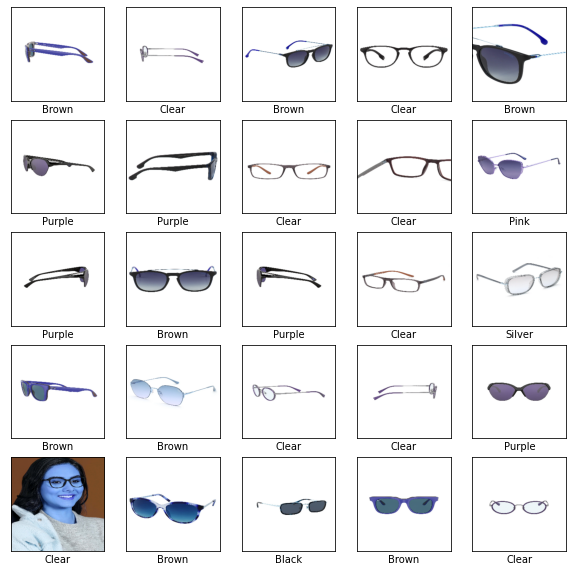

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_train[i]))
    plt.xlabel(categories[np.argmax(y_train[i])])
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D


# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/15
24/24 [==============================] - 7s 256ms/step - loss: 2.5755 - accuracy: 0.2553
Epoch 2/15
24/24 [==============================] - 5s 225ms/step - loss: 1.6600 - accuracy: 0.2553
Epoch 3/15
24/24 [==============================] - 5s 221ms/step - loss: 1.6343 - accuracy: 0.3617
Epoch 4/15
24/24 [==============================] - 5s 222ms/step - loss: 1.4241 - accuracy: 0.4255
Epoch 5/15
24/24 [==============================] - 5s 224ms/step - loss: 1.0190 - accuracy: 0.6383
Epoch 6/15
24/24 [==============================] - 5s 223ms/step - loss: 0.7825 - accuracy: 0.7447
Epoch 7/15
24/24 [==============================] - 6s 230ms/step - loss: 0.5804 - accuracy: 0.7660
Epoch 8/15
24/24 [==============================] - 5s 221ms/step - loss: 0.4304 - accuracy: 0.8936
Epoch 9/15
24/24 [==============================] - 5s 223ms/step - loss: 0.4747 - accuracy: 0.8298
Epoch 10/15
24/24 [==============================] - 5s 222ms/step - loss: 0.8009 - accuracy: 0.7021

In [7]:
len(y_test)

6

In [8]:
y_predicted = model.predict(x_test)

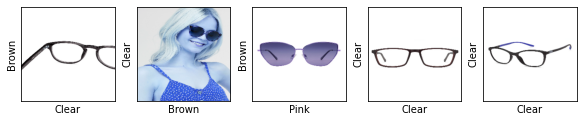

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
    plt.ylabel(categories[np.argmax(y_predicted[i])])
plt.show()

In [10]:
import tensorflow as tf

num_classes = y_train.shape[1]
# Define the CNN model
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model2.fit(x_train, y_train, epochs=10, batch_size=1)

# Evaluate the model
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc2)


Epoch 1/10
47/47 [==============================] - 9s 188ms/step - loss: 4.7072 - accuracy: 0.2553
Epoch 2/10
47/47 [==============================] - 8s 179ms/step - loss: 1.7179 - accuracy: 0.3404
Epoch 3/10
47/47 [==============================] - 8s 175ms/step - loss: 1.6269 - accuracy: 0.3404
Epoch 4/10
47/47 [==============================] - 8s 178ms/step - loss: 1.5745 - accuracy: 0.4894
Epoch 5/10
47/47 [==============================] - 8s 177ms/step - loss: 1.2986 - accuracy: 0.5106
Epoch 6/10
47/47 [==============================] - 9s 198ms/step - loss: 0.9956 - accuracy: 0.6170
Epoch 7/10
47/47 [==============================] - 8s 171ms/step - loss: 0.9660 - accuracy: 0.7447
Epoch 8/10
47/47 [==============================] - 8s 166ms/step - loss: 0.6927 - accuracy: 0.7447
Epoch 9/10
47/47 [==============================] - 8s 167ms/step - loss: 0.6255 - accuracy: 0.8085
Epoch 10/10
47/47 [==============================] - 8s 165ms/step - loss: 0.5010 - accuracy: 0.8298

In [11]:
y_predicted2 = model2.predict(x_test)

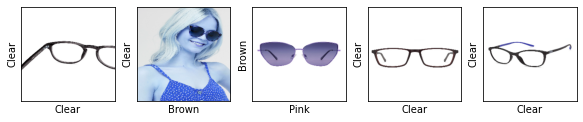

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
    plt.ylabel(categories[np.argmax(y_predicted2[i])])
plt.show()

In [13]:
model2.save('lens_color.h5')